installing tools and weights

In [204]:
import json 
import os
from tqdm.auto import tqdm
from utils import web_cam, node_json, split_json, visualize, web_cam_photo
import gdown
# gdown.download('https://drive.google.com/uc?id=16_Ntdx-Wvn5Lf2F1MmcdGrPasNHwjkin', 
#                r'model\epoch 3-4200 weight.pt')
# gdown.download('https://drive.google.com/uc?id=1Znb_UM4PmlL-qXY5iBaU9hQcxeQC4OkI',
#                'model\checkpoint.tar')

creat folder & data

FINALE

In [196]:
ratio = 64 #每帧複製次數
interval = 1 #隔幾幀
datasetfolder = 'dataset'
length = 10
import numpy as np

datasetfolder = 'dataset'
word = '爸爸催促我立刻上床睡覺'
class_name = word
save_folder = os.path.join(datasetfolder, class_name)
input_video = os.path.join(save_folder, 'output.mp4')
input_json  = os.path.join(save_folder, 'nodes.json')
time_mark_path=os.path.join(save_folder, 'time mark.json')
output_folder = os.path.join(save_folder, 'output')
os.makedirs(save_folder, exist_ok=True)

#web_cam(save_folder=save_folder, recording_time=length, break_time=1)
node_json(input_video, save_folder)
split_json(input_json,
           save_folder,
           time_mark_path,
           uniform_length=length*32)
json_path = os.path.join(save_folder,'segmented.json')
visualize(json_path, 192)

with open(json_path, 'r') as f:
    splited_json = json.load(f)
print(len(splited_json))
indices = [i for i in range(20)] + [(i+21) for i in range(20)]
data = np.array(splited_json)
x = data[:, indices, :]
container = np.zeros_like(x)
container[:,20:] = x[:,20:]
selected_data = container


output_path = os.path.join(save_folder, class_name)
os.makedirs(output_path, exist_ok=True)
for i, index in enumerate(range(0, len(splited_json), interval)):
    output_container = []

    for _ in range(ratio):
        output_container.append(selected_data[index].tolist())

    with open(os.path.join(output_path, f'{word}_output_data_{i}.json'), 'w') as file:
        json.dump(output_container, file,indent=4)

205 206
(152, 42, 2)
(320, 42, 2) (192, 42, 2)
320


# model

In [197]:
import torchvision
import torch
import os
from model.model import MAE
from utils import ViT, load_json
model_path = r'C:\Users\acnight\Documents\GitHub\SLPT\Project-SLPT\Sign_split\epoch-15weight.pt'
num_class = 23

datasetfolder = 'dataset'
class_name = word
save_folder = os.path.join(datasetfolder, class_name)
input_video = os.path.join(save_folder, 'output.mp4')
input_json  = os.path.join(save_folder, 'nodes.json')
time_mark_path=os.path.join(save_folder, 'time mark.json')
output_folder = os.path.join(save_folder, 'output')
os.makedirs(save_folder, exist_ok=True)
output_path = os.path.join(save_folder, class_name)

In [198]:
CHECKPOINT_PATH = 'checkpoint.tar'

checkpoint = torch.load(CHECKPOINT_PATH)
step = checkpoint['step']
mean = checkpoint['mean']
std = checkpoint['std']


vit = torchvision.models.vit_b_16(weights=None)
pretrained_model = MAE(vit, 64, 80)
model = ViT(pretrained_model, num_class = num_class)
model.load_state_dict(torch.load(model_path))
model = model.to('cuda')
model = model.eval()

In [199]:
prediction_list = [[] for _ in range(num_class)]
lable = []

for i in range(len(os.listdir(output_path))):
    path = os.path.join(output_path, f'{word}_output_data_{i}.json')
    x = load_json(path, 
                  mean=mean,
                  std=std,
                  augment=False).to('cuda')
    prediction = model(x)
    _, predicted_class = torch.max(prediction, 1)
    lable.append(predicted_class.detach())
    for i, item in enumerate(prediction.detach()[0].tolist()):
        prediction_list[i].append(item)

In [200]:
results = []
for i, item in enumerate(lable):
    #print(i, item.tolist()[0])
    results.append((i, item.tolist()[0]))
result_path = os.path.join(save_folder,'result.json')
print(results)
with open(result_path,'w') as f:
    json.dump(results,f,indent=4)

[(0, 5), (1, 15), (2, 15), (3, 15), (4, 16), (5, 16), (6, 16), (7, 21), (8, 21), (9, 21), (10, 21), (11, 21), (12, 21), (13, 21), (14, 21), (15, 21), (16, 21), (17, 22), (18, 22), (19, 22), (20, 22), (21, 22), (22, 17), (23, 17), (24, 9), (25, 17), (26, 5), (27, 3), (28, 15), (29, 6), (30, 6), (31, 6), (32, 6), (33, 6), (34, 6), (35, 6), (36, 6), (37, 6), (38, 6), (39, 6), (40, 6), (41, 4), (42, 15), (43, 21), (44, 16), (45, 16), (46, 16), (47, 16), (48, 21), (49, 17), (50, 17), (51, 17), (52, 17), (53, 17), (54, 17), (55, 17), (56, 14), (57, 14), (58, 14), (59, 14), (60, 14), (61, 14), (62, 14), (63, 14), (64, 14), (65, 14), (66, 14), (67, 14), (68, 14), (69, 14), (70, 14), (71, 14), (72, 14), (73, 14), (74, 14), (75, 14), (76, 14), (77, 14), (78, 14), (79, 14), (80, 14), (81, 14), (82, 14), (83, 14), (84, 14), (85, 14), (86, 14), (87, 14), (88, 14), (89, 14), (90, 14), (91, 14), (92, 14), (93, 14), (94, 14), (95, 14), (96, 14), (97, 14), (98, 14), (99, 14), (100, 14), (101, 14), (102

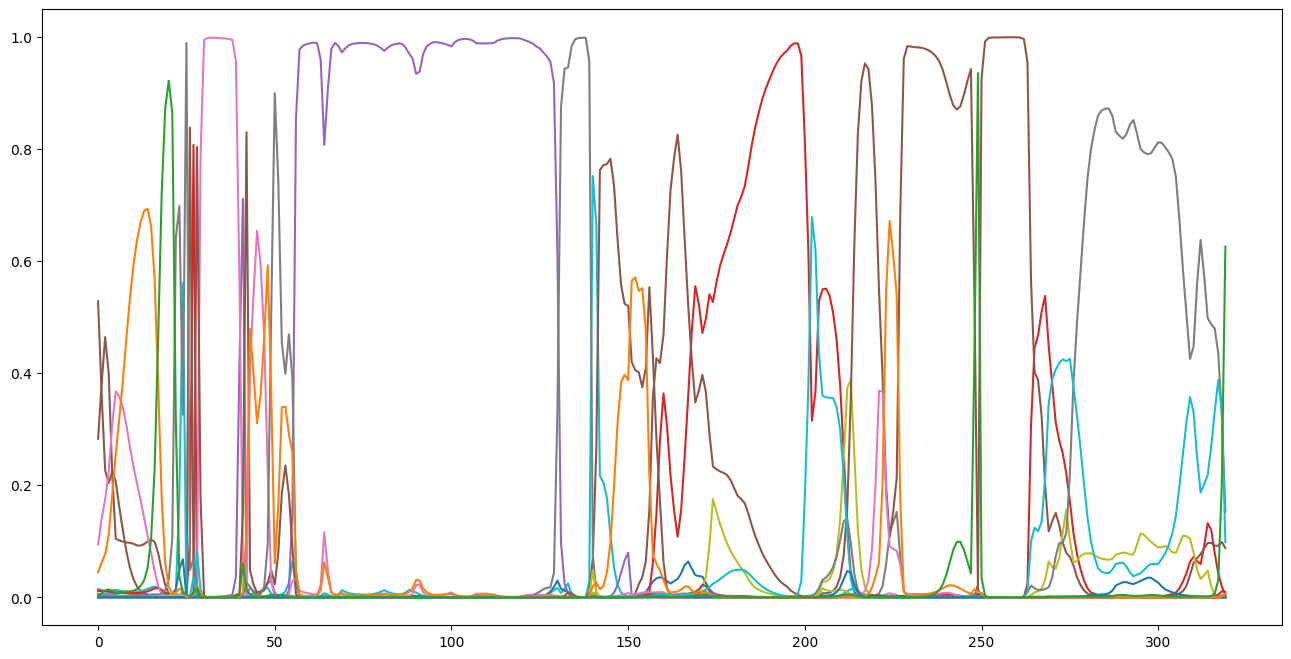

In [201]:
import matplotlib.pyplot as plt

# 创建一些示例数据
x = [i for i in range(len(prediction_list[0]))]

# 设置画布大小（单位：英寸）
plt.figure(figsize=(16, 8))

# 绘制折线图，并正确拼写 label 参数
for y in prediction_list:
    plt.plot(x, y, label='')
# 显示图表
plt.show()

In [202]:
from utils import visualize_slider
json_path = os.path.join(save_folder,'segmented.json')
visualize_slider(json_path, 320)

error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window_w32.cpp:2561: error: (-27:Null pointer) NULL window: 'Hand Key Points' in function 'cvGetTrackbarPos'
